# Project work, All Cyclists during years 2014-2019

In [1]:
#
# Import libraries
#
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#
# Read excel file into DataFrame
#
HKI_bikers = pd.read_excel('Helsingin_pyorailijamaarat.xlsx')

VANTAA_bikers = pd.read_excel('Vantaan_pyorailijamaarat.xlsx')

ESPOO_bikers = pd.read_excel('Espoon_pyorailijamaarat.xlsx')

## Cyclists

### Helsinki

In [3]:
# print out dataset: Helsinki cyclists
HKI_bikers

,Päivämäärä,Auroransilta,Eteläesplanadi,Huopalahti (asema),Kaisaniemi/Eläintarhanlahti,Kaivokatu,Kulosaaren silta et.,Kulosaaren silta po.,Kuusisaarentie,"Käpylä, Pohjoisbaana",...,Merikannontie,Munkkiniemen silta eteläpuoli,Munkkiniemi silta pohjoispuoli,Heperian puisto/Ooppera,Pitkäsilta itäpuoli,Pitkäsilta länsipuoli,Lauttasaaren silta pohjoispuoli,Ratapihantie,Viikintie,Baana
0,ke 1 tammi 2014 00:00,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,5.0,3.0,NaN,11.0,NaN,NaN,NaN,8
1,ke 1 tammi 2014 01:00,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,5.0,1.0,NaN,8.0,NaN,NaN,NaN,4
2,ke 1 tammi 2014 02:00,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,14.0,NaN,NaN,NaN,11
3,ke 1 tammi 2014 03:00,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,2.0,0.0,NaN,7.0,NaN,NaN,NaN,3
4,ke 1 tammi 2014 04:00,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,9.0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51115,to 31 loka 2019 19:00,24.0,60.0,47.0,46.0,104.0,12.0,44.0,20.0,0.0,...,76.0,46.0,18.0,110.0,79.0,45.0,0.0,42.0,NaN,111
51116,to 31 loka 2019 20:00,32.0,51.0,34.0,39.0,71.0,14.0,24.0,12.0,0.0,...,47.0,41.0,27.0,90.0,56.0,41.0,0.0,39.0,NaN,82
51117,to 31 loka 2019 21:00,21.0,23.0,19.0,13.0,62.0,7.0,18.0,14.0,0.0,...,37.0,24.0,16.0,68.0,44.0,37.0,0.0,42.0,NaN,74
51118,to 31 loka 2019 22:00,8.0,13.0,8.0,9.0,34.0,3.0,13.0,8.0,0.0,...,13.0,12.0,8.0,26.0,23.0,9.0,0.0,9.0,NaN,33


In [4]:
#
# rename columns' column names, change ä -> a and ö -> o and names from finnish to english
#
HKI_bikers = HKI_bikers.rename({'Päivämäärä': 'Date_tmp', 'Eteläesplanadi': 'Etelaesplanadi', 'Huopalahti (asema)': 'Huopalahti (station)', 'Kaisaniemi/Eläintarhanlahti': 'Kaisaniemi/ Elaintarhanlahti'}, axis=1)
HKI_bikers = HKI_bikers.rename({'Kulosaaren silta et.': 'Kulosaari bridge south', 'Kulosaaren silta po. ': 'Kulosaari bridge north', 'Käpylä, Pohjoisbaana': 'Kapyla, Pohjoisbaana'}, axis=1)
HKI_bikers = HKI_bikers.rename({'Lauttasaaren silta eteläpuoli': 'Lauttasaari bridge south side', 'Munkkiniemen silta eteläpuoli': 'Munkkiniemi bridge south side'}, axis=1)
HKI_bikers = HKI_bikers.rename({'Munkkiniemi silta pohjoispuoli': 'Munkkiniemi bridge north side', 'Heperian puisto/Ooppera': 'Heperia park/Ooppera', 'Pitkäsilta itäpuoli': 'Pitkasilta east side'}, axis=1)
HKI_bikers = HKI_bikers.rename({'Pitkäsilta länsipuoli': 'Pitkasilta west side', 'Lauttasaaren silta pohjoispuoli': 'Lauttasaari bridge north side'}, axis=1)
#
# replace finnish word with english words due to datetime convertion
#
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('tammi', 'Jan')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('helmi', 'Feb')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('maalis', 'Mar')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('huhti', 'Apr')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('touko', 'May')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('kesä', 'Jun')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('heinä', 'Jul')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('elo', 'Aug')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('syys', 'Sep')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('loka', 'Oct')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('marras', 'Nov')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('joulu', 'Dec')

HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('ma', 'Mon')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('ti', 'Tue')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('ke', 'Wed')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('to', 'Thu')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('pe', 'Fri')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('la', 'Sat')
HKI_bikers.Date_tmp = HKI_bikers.Date_tmp.str.replace('su', 'Sun')
#
# here is weekday and datetime split to each own columns
#
weekday = HKI_bikers["Date_tmp"].str.split(" ", n = 1, expand = True)
HKI_bikers.insert(0, 'Weekday', weekday[0])
HKI_bikers.insert(1, 'Date', weekday[1])
HKI_bikers = HKI_bikers.drop(['Date_tmp'], axis=1)
#
# Change date and time to datetime type
#
HKI_bikers.Date = pd.to_datetime(HKI_bikers.Date, format='%d %b %Y %H:%M', errors='coerce')
#
# split date and time to two different columns, this command change value to string
#
HKI_bikers.insert(2, 'Time', HKI_bikers.Date.dt.strftime('%H:%M:%S'))
HKI_bikers.Date = HKI_bikers.Date.dt.strftime('%Y-%m-%d')
#
# change date (paivamaara) back datetime -value
#
HKI_bikers.Date = pd.to_datetime(HKI_bikers.Date, format='%Y-%m-%d', errors='coerce')
# print put result
# HKI_bikers

## Combine data and plotting

### Create Helsinki weekdays datasets

In [5]:
#
# Create own table for each weekday
#
Mon_days_H = HKI_bikers[(HKI_bikers['Weekday'] == 'Mon')]
Mon_days_H = Mon_days_H.drop(['Date'], axis=1)
Tue_days_H = HKI_bikers[(HKI_bikers['Weekday'] == 'Tue')]
Tue_days_H = Tue_days_H.drop(['Date'], axis=1)
Wed_days_H = HKI_bikers[(HKI_bikers['Weekday'] == 'Wed')]
Wed_days_H = Wed_days_H.drop(['Date'], axis=1)
Thu_days_H = HKI_bikers[(HKI_bikers['Weekday'] == 'Thu')]
Thu_days_H = Thu_days_H.drop(['Date'], axis=1)
Fri_days_H = HKI_bikers[(HKI_bikers['Weekday'] == 'Fri')]
Fri_days_H = Fri_days_H.drop(['Date'], axis=1)
Sat_days_H = HKI_bikers[(HKI_bikers['Weekday'] == 'Sat')]
Sat_days_H = Sat_days_H.drop(['Date'], axis=1)
Sun_days_H = HKI_bikers[(HKI_bikers['Weekday'] == 'Sun')]
Sun_days_H = Sun_days_H.drop(['Date'], axis=1)

# Mondays
Mon_days_H = Mon_days_H.drop(['Weekday'], axis=1)
Mon_days_gb_H = Mon_days_H.groupby('Time')
Mon_days_gb_H = Mon_days_gb_H.sum(axis=0)
# Tuesdays
Tue_days_H = Tue_days_H.drop(['Weekday'], axis=1)
Tue_days_gb_H = Tue_days_H.groupby('Time')
Tue_days_gb_H = Tue_days_gb_H.sum(axis=0)
# Wednesdays
Wed_days_H = Wed_days_H.drop(['Weekday'], axis=1)
Wed_days_gb_H = Wed_days_H.groupby('Time')
Wed_days_gb_H = Wed_days_gb_H.sum(axis=0)
# Thursdays
Thu_days_H = Thu_days_H.drop(['Weekday'], axis=1)
Thu_days_gb_H = Thu_days_H.groupby('Time')
Thu_days_gb_H = Thu_days_gb_H.sum(axis=0)
# Fridays
Fri_days_H = Fri_days_H.drop(['Weekday'], axis=1)
Fri_days_gb_H = Fri_days_H.groupby('Time')
Fri_days_gb_H = Fri_days_gb_H.sum(axis=0)
# Saturdays
Sat_days_H = Sat_days_H.drop(['Weekday'], axis=1)
Sat_days_gb_H = Sat_days_H.groupby('Time')
Sat_days_gb_H = Sat_days_gb_H.sum(axis=0)
# Sundays
Sun_days_H = Sun_days_H.drop(['Weekday'], axis=1)
Sun_days_gb_H = Sun_days_H.groupby('Time')
Sun_days_gb_H = Sun_days_gb_H.sum(axis=0)

### Combine all Helsinki measurement points together (sum of them)

In [6]:
Mon_days_gb_H = Mon_days_gb_H.sum(axis=1)
Tue_days_gb_H = Tue_days_gb_H.sum(axis=1)
Wed_days_gb_H = Wed_days_gb_H.sum(axis=1)
Thu_days_gb_H = Thu_days_gb_H.sum(axis=1)
Fri_days_gb_H = Fri_days_gb_H.sum(axis=1)
Sat_days_gb_H = Sat_days_gb_H.sum(axis=1)
Sun_days_gb_H = Sun_days_gb_H.sum(axis=1)

### Vantaa

In [7]:
# print out dataset: Vantaa cyclists
VANTAA_bikers

,Päivämäärä,Asolanväylä P,Asolanväylä E,Hakunilantie P,Hakunilantie E,Kyytitie I,Kyytitie L,Kaislaranta P,Kaislaranta E,Kuusijärvi P,...,Simonkyläntie P,Simonkyläntie E,Solkikuja I,Solkikuja L,Vanha Porvoontie P,Vanha Porvoontie E,Vantaanlaaksontie P,Vantaanlaaksontie E,Ylästöntie I,Ylästöntie L
0,torstai 1.1.2015 0:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,torstai 1.1.2015 1:00,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,torstai 1.1.2015 2:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,torstai 1.1.2015 3:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,torstai 1.1.2015 4:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,lauantai 31.12.2016 19:00,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17540,lauantai 31.12.2016 20:00,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17541,lauantai 31.12.2016 21:00,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17542,lauantai 31.12.2016 22:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# rename columns' column names, change ä -> a and ö -> o
VANTAA_bikers = VANTAA_bikers.rename({'Päivämäärä': 'Date_tmp', 'Asolanväylä P': 'Asolanvayla P', 'Asolanväylä E': 'Asolanvayla E'}, axis=1)
VANTAA_bikers = VANTAA_bikers.rename({'Kuusijärvi P': 'Kuusijarvi P', 'Kuusijärvi E': 'Kuusijarvi E', 'Kytöpuisto P': 'Kytopuisto P', 'Ylästöntie I':'Ylastontie I'}, axis=1)
VANTAA_bikers = VANTAA_bikers.rename({'Ylästöntie L': 'Ylastontie L', 'Simonkyläntie P':'Simonkylantie P', 'Simonkyläntie E':'Simonkylantie E'}, axis=1)
#
# replace finnish word with english words due to datetime convertion
#
VANTAA_bikers['Date_tmp'] = VANTAA_bikers.Date_tmp.str.replace('maanantai', 'Mon')
VANTAA_bikers['Date_tmp'] = VANTAA_bikers.Date_tmp.str.replace('tiistai', 'Tue')
VANTAA_bikers['Date_tmp'] = VANTAA_bikers.Date_tmp.str.replace('keskiviikko', 'Wed')
VANTAA_bikers['Date_tmp'] = VANTAA_bikers.Date_tmp.str.replace('torstai', 'Thu')
VANTAA_bikers['Date_tmp'] = VANTAA_bikers.Date_tmp.str.replace('perjantai', 'Fri')
VANTAA_bikers['Date_tmp'] = VANTAA_bikers.Date_tmp.str.replace('lauantai', 'Sat')
VANTAA_bikers['Date_tmp'] = VANTAA_bikers.Date_tmp.str.replace('sunnuntai', 'Sun')
#
# here is weekday and datetime split to each own columns
#
weekday = VANTAA_bikers["Date_tmp"].str.split(" ", n = 1, expand = True)
VANTAA_bikers.insert(0, 'Weekday', weekday[0])
VANTAA_bikers.insert(1, 'Date', weekday[1])
VANTAA_bikers = VANTAA_bikers.drop(['Date_tmp'], axis=1)
# Change date and time to datetime type
VANTAA_bikers.Date = pd.to_datetime(VANTAA_bikers.Date, format='%d.%m.%Y %H:%M', errors='coerce')
# split date and time to two different columns, this command change value to string
VANTAA_bikers.insert(2, 'Time', VANTAA_bikers.Date.dt.strftime('%H:%M:%S'))
VANTAA_bikers.Date = VANTAA_bikers.Date.dt.strftime('%Y-%m-%d')
# change date back datetime -value
VANTAA_bikers.Date = pd.to_datetime(VANTAA_bikers.Date, format='%Y-%m-%d', errors='coerce')
# print put result
# VANTAA_bikers

## Combine data and plotting

### Create Vantaa weekdays datasets

In [9]:
#
# Create own table for each weekday
#
Mon_days_V = VANTAA_bikers[(VANTAA_bikers['Weekday'] == 'Mon')]
Mon_days_V = Mon_days_V.drop(['Date'], axis=1)
Tue_days_V = VANTAA_bikers[(VANTAA_bikers['Weekday'] == 'Tue')]
Tue_days_V = Tue_days_V.drop(['Date'], axis=1)
Wed_days_V = VANTAA_bikers[(VANTAA_bikers['Weekday'] == 'Wed')]
Wed_days_V = Wed_days_V.drop(['Date'], axis=1)
Thu_days_V = VANTAA_bikers[(VANTAA_bikers['Weekday'] == 'Thu')]
Thu_days_V = Thu_days_V.drop(['Date'], axis=1)
Fri_days_V = VANTAA_bikers[(VANTAA_bikers['Weekday'] == 'Fri')]
Fri_days_V = Fri_days_V.drop(['Date'], axis=1)
Sat_days_V = VANTAA_bikers[(VANTAA_bikers['Weekday'] == 'Sat')]
Sat_days_V = Sat_days_V.drop(['Date'], axis=1)
Sun_days_V = VANTAA_bikers[(VANTAA_bikers['Weekday'] == 'Sun')]
Sun_days_V = Sun_days_V.drop(['Date'], axis=1)

# Mondays
Mon_days_V = Mon_days_V.drop(['Weekday'], axis=1)
Mon_days_V_gb = Mon_days_V.groupby('Time')
Mon_days_V_gb = Mon_days_V_gb.sum(axis=0)
# Tuesdays
Tue_days_V = Tue_days_V.drop(['Weekday'], axis=1)
Tue_days_V_gb = Tue_days_V.groupby('Time')
Tue_days_V_gb = Tue_days_V_gb.sum(axis=0)
# Wednesdays
Wed_days_V = Wed_days_V.drop(['Weekday'], axis=1)
Wed_days_V_gb = Wed_days_V.groupby('Time')
Wed_days_V_gb = Wed_days_V_gb.sum(axis=0)
# Thursdays
Thu_days_V = Thu_days_V.drop(['Weekday'], axis=1)
Thu_days_V_gb = Thu_days_V.groupby('Time')
Thu_days_V_gb = Thu_days_V_gb.sum(axis=0)
# Fridays
Fri_days_V = Fri_days_V.drop(['Weekday'], axis=1)
Fri_days_V_gb = Fri_days_V.groupby('Time')
Fri_days_V_gb = Fri_days_V_gb.sum(axis=0)
# Saturdays
Sat_days_V = Sat_days_V.drop(['Weekday'], axis=1)
Sat_days_V_gb = Sat_days_V.groupby('Time')
Sat_days_V_gb = Sat_days_V_gb.sum(axis=0)
# Sundays
Sun_days_V = Sun_days_V.drop(['Weekday'], axis=1)
Sun_days_V_gb = Sun_days_V.groupby('Time')
Sun_days_V_gb = Sun_days_V_gb.sum(axis=0)

### Combine all Vantaa measurement points together (sum of them)

In [10]:
Mon_days_V_gb = Mon_days_V_gb.sum(axis=1)
Tue_days_V_gb = Tue_days_V_gb.sum(axis=1)
Wed_days_V_gb = Wed_days_V_gb.sum(axis=1)
Thu_days_V_gb = Thu_days_V_gb.sum(axis=1)
Fri_days_V_gb = Fri_days_V_gb.sum(axis=1)
Sat_days_V_gb = Sat_days_V_gb.sum(axis=1)
Sun_days_V_gb = Sun_days_V_gb.sum(axis=1)

### Espoo

In [11]:
# print out dataset: Espoo cyclists
ESPOO_bikers

,Päivä,Päivämäärä,Aika,Espoon portti (Eco-Counter),Espoonlahdenraitti (Eco-Counter),Gallen-Kallela (Eco-Counter),Gallen-Kallelan tie (DSL10),Haukilahti (Viacount),Kalevalantien alikulku (DSL10),"Kehä I, Laajalahti (DSL10)",...,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135
0,pe,2014-01-03,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,pe,2014-01-03,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,pe,2014-01-03,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,pe,2014-01-03,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,pe,2014-01-03,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38011,NaN,2019-05-13,19:00:00,69.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
38012,NaN,2019-05-13,20:00:00,76.0,NaN,54.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
38013,NaN,2019-05-13,21:00:00,46.0,NaN,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
38014,NaN,2019-05-13,22:00:00,25.0,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [12]:
#
# drop unnamed columns away, those columns are all empty
#
i = 43
for x in range(len(ESPOO_bikers.columns)-43):
    name = 'Unnamed: {}'.format(i)
    ESPOO_bikers = ESPOO_bikers.drop([name], axis=1)
    i += 1

# rename columns' column names, change ä -> a and ö -> o
ESPOO_bikers = ESPOO_bikers.rename({'Päivä': 'Weekday', 'Päivämäärä': 'Date', 'Aika':'Time', 'Keskuspuisto, etelähaara, itä (Viacount 2)': 'Keskuspuisto, etelahaara, ita (Viacount 2)', 'Keskuspuisto, etelähaara, länsi (Viacount 2)': 'Keskuspuisto, etelahaara, lansi (Viacount 2)'}, axis=1)
ESPOO_bikers = ESPOO_bikers.rename({'Keskuspuisto, Grimängen (Viacount 2)': 'Keskuspuisto, Grimangen (Viacount 2)', 'Keskuspuisto, Mössenkär (Viacount 2)': 'Keskuspuisto, Mossenkar (Viacount 2)'}, axis=1)
ESPOO_bikers = ESPOO_bikers.rename({'Kiltaraitti, etelä (Viacount 2)': 'Kiltaraitti, etela (Viacount 2)', 'Kirkkojärventie (DSL10)': 'Kirkkojarventie (DSL10)', 'Länsiväylä (Eco-counter)': 'Lansivayla (Eco-counter)'}, axis=1)
ESPOO_bikers = ESPOO_bikers.rename({'Länsiväylä, Karhusaari (DSL10)': 'Lansivayla, Karhusaari (DSL10)', 'Pitkäjärventie (DSL10)': 'Pitkajarventie (DSL10)', 'Päivänkestämönpolku, Kera (Eco-Counter)': 'Paivankestamonpolku, Kera (Eco-Counter)'}, axis=1)
ESPOO_bikers = ESPOO_bikers.rename({'Suomenlahdentie, eteläinen (viacount)': 'Suomenlahdentie, etelainen (viacount)', 'Tapiola,Länsituulenkuja (Eco-Counter)': 'Tapiola,Lansituulenkuja (Eco-Counter)', 'Vihdintie, Kalajärven itäpuoli (Viacount 2)': 'Vihdintie, Kalajarven itapuoli (Viacount 2)'}, axis=1)
ESPOO_bikers = ESPOO_bikers.rename({'Vihdintie, Uusmäki (DSL10)': 'Vihdintie, Uusmaki (DSL10)', 'Ylismäentie,Suurpelto (Eco-Counter)': 'Ylismaentie,Suurpelto (Eco-Counter)'}, axis=1)
ESPOO_bikers = ESPOO_bikers.rename({'Kehä I, Laajalahti (DSL10)': 'Keha I, Laajalahti (DSL10)', 'Kehä I, Laajalahti (Eco-counter)': 'Keha I, Laajalahti (Eco-counter)'}, axis=1)
#
# replace finnish word with english words due to datetime convertion
#
ESPOO_bikers.Weekday = ESPOO_bikers.Weekday.str.replace('ma', 'Mon')
ESPOO_bikers.Weekday = ESPOO_bikers.Weekday.str.replace('ti', 'Tue')
ESPOO_bikers.Weekday = ESPOO_bikers.Weekday.str.replace('ke', 'Wed')
ESPOO_bikers.Weekday = ESPOO_bikers.Weekday.str.replace('to', 'Thu')
ESPOO_bikers.Weekday = ESPOO_bikers.Weekday.str.replace('pe', 'Fri')
ESPOO_bikers.Weekday = ESPOO_bikers.Weekday.str.replace('la', 'Sat')
ESPOO_bikers.Weekday = ESPOO_bikers.Weekday.str.replace('su', 'Sun')
#
# add missing weekdays to dataset
#
ESPOO_bikers['Weekday'] = ESPOO_bikers.Date.dt.day_name()
ESPOO_bikers['Weekday'] = ESPOO_bikers.Weekday.str.replace('Monday', 'Mon')
ESPOO_bikers['Weekday'] = ESPOO_bikers.Weekday.str.replace('Tuesday', 'Tue')
ESPOO_bikers['Weekday'] = ESPOO_bikers.Weekday.str.replace('Wednesday', 'Wed')
ESPOO_bikers['Weekday'] = ESPOO_bikers.Weekday.str.replace('Thursday', 'Thu')
ESPOO_bikers['Weekday'] = ESPOO_bikers.Weekday.str.replace('Friday', 'Fri')
ESPOO_bikers['Weekday'] = ESPOO_bikers.Weekday.str.replace('Saturday', 'Sat')
ESPOO_bikers['Weekday'] = ESPOO_bikers.Weekday.str.replace('Sunday', 'Sun')
#
# format time to string
#
ESPOO_bikers.insert(2, 'apu', pd.to_datetime(ESPOO_bikers.Time, format='%H:%M:%S', errors='coerce'))
ESPOO_bikers.insert(2, 'Time2', ESPOO_bikers.apu.dt.strftime('%H:%M:%S'))
ESPOO_bikers = ESPOO_bikers.drop(['apu'], axis=1)
ESPOO_bikers = ESPOO_bikers.drop(['Time'], axis=1)
ESPOO_bikers = ESPOO_bikers.rename({'Time2': 'Time'}, axis=1)
# print put result
# ESPOO_bikers

## Combine data and plotting

### Create Espoo weekdays datasets

In [13]:
#
# Create own table for each weekday
#
Mon_days_E = ESPOO_bikers[(ESPOO_bikers['Weekday'] == 'Mon')]
Mon_days_E = Mon_days_E.drop(['Date'], axis=1)
Tue_days_E = ESPOO_bikers[(ESPOO_bikers['Weekday'] == 'Tue')]
Tue_days_E = Tue_days_E.drop(['Date'], axis=1)
Wed_days_E = ESPOO_bikers[(ESPOO_bikers['Weekday'] == 'Wed')]
Wed_days_E = Wed_days_E.drop(['Date'], axis=1)
Thu_days_E = ESPOO_bikers[(ESPOO_bikers['Weekday'] == 'Thu')]
Thu_days_E = Thu_days_E.drop(['Date'], axis=1)
Fri_days_E = ESPOO_bikers[(ESPOO_bikers['Weekday'] == 'Fri')]
Fri_days_E = Fri_days_E.drop(['Date'], axis=1)
Sat_days_E = ESPOO_bikers[(ESPOO_bikers['Weekday'] == 'Sat')]
Sat_days_E = Sat_days_E.drop(['Date'], axis=1)
Sun_days_E = ESPOO_bikers[(ESPOO_bikers['Weekday'] == 'Sun')]
Sun_days_E = Sun_days_E.drop(['Date'], axis=1)

# Mondays
Mon_days_E = Mon_days_E.drop(['Weekday'], axis=1)
Mon_days_E_gb = Mon_days_E.groupby('Time')
Mon_days_E_gb = Mon_days_E_gb.sum(axis=0)
# Tuesdays
Tue_days_E = Tue_days_E.drop(['Weekday'], axis=1)
Tue_days_E_gb = Tue_days_E.groupby('Time')
Tue_days_E_gb = Tue_days_E_gb.sum(axis=0)
# Wednesdays
Wed_days_E = Wed_days_E.drop(['Weekday'], axis=1)
Wed_days_E_gb = Wed_days_E.groupby('Time')
Wed_days_E_gb = Wed_days_E_gb.sum(axis=0)
# Thursdays
Thu_days_E = Thu_days_E.drop(['Weekday'], axis=1)
Thu_days_E_gb = Thu_days_E.groupby('Time')
Thu_days_E_gb = Thu_days_E_gb.sum(axis=0)
# Fridays
Fri_days_E = Fri_days_E.drop(['Weekday'], axis=1)
Fri_days_E_gb = Fri_days_E.groupby('Time')
Fri_days_E_gb = Fri_days_E_gb.sum(axis=0)
# Saturdays
Sat_days_E = Sat_days_E.drop(['Weekday'], axis=1)
Sat_days_E_gb = Sat_days_E.groupby('Time')
Sat_days_E_gb = Sat_days_E_gb.sum(axis=0)
# Sundays
Sun_days_E = Sun_days_E.drop(['Weekday'], axis=1)
Sun_days_E_gb = Sun_days_E.groupby('Time')
Sun_days_E_gb = Sun_days_E_gb.sum(axis=0)

### Combine all Espoo measurement points together (sum of them)

In [14]:
Mon_days_E_gb = Mon_days_E_gb.sum(axis=1)
Tue_days_E_gb = Tue_days_E_gb.sum(axis=1)
Wed_days_E_gb = Wed_days_E_gb.sum(axis=1)
Thu_days_E_gb = Thu_days_E_gb.sum(axis=1)
Fri_days_E_gb = Fri_days_E_gb.sum(axis=1)
Sat_days_E_gb = Sat_days_E_gb.sum(axis=1)
Sun_days_E_gb = Sun_days_E_gb.sum(axis=1)

# Visualizing

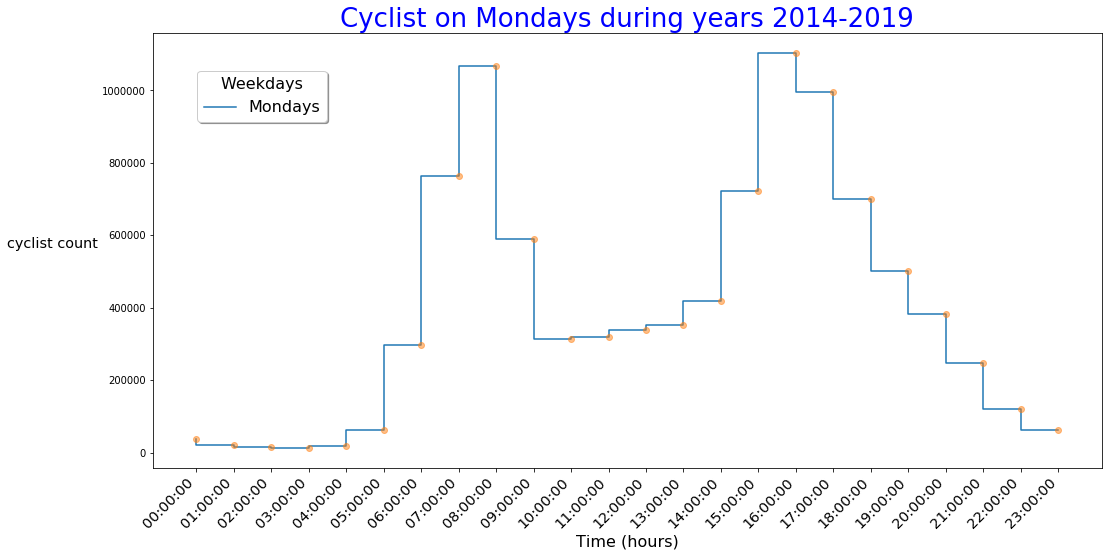

In [15]:
# lets merge Mondays together
Mondays_total = pd.concat([Mon_days_gb_H, Mon_days_V_gb, Mon_days_E_gb], axis=1)
# Combine all Mondays measurement points together (sum of them)
Mondays_total = Mondays_total.sum(axis=1)
# do Step Demo chart from cyclist on Mondays
plt.figure(figsize=(17, 8))
plt.step(Mondays_total.index, Mondays_total, label='Mondays')
plt.plot(Mondays_total.index, Mondays_total, 'C1o', alpha=0.5)
plt.title('Cyclist on Mondays during years 2014-2019', fontsize=26, c='blue')
plt.legend(title='Weekdays', title_fontsize=16, bbox_to_anchor=(0.20, 0.95), borderaxespad=1.0, fontsize=16, shadow=True, columnspacing=4.0, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize='x-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=16)
plt.xticks(Mondays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
plt.show()

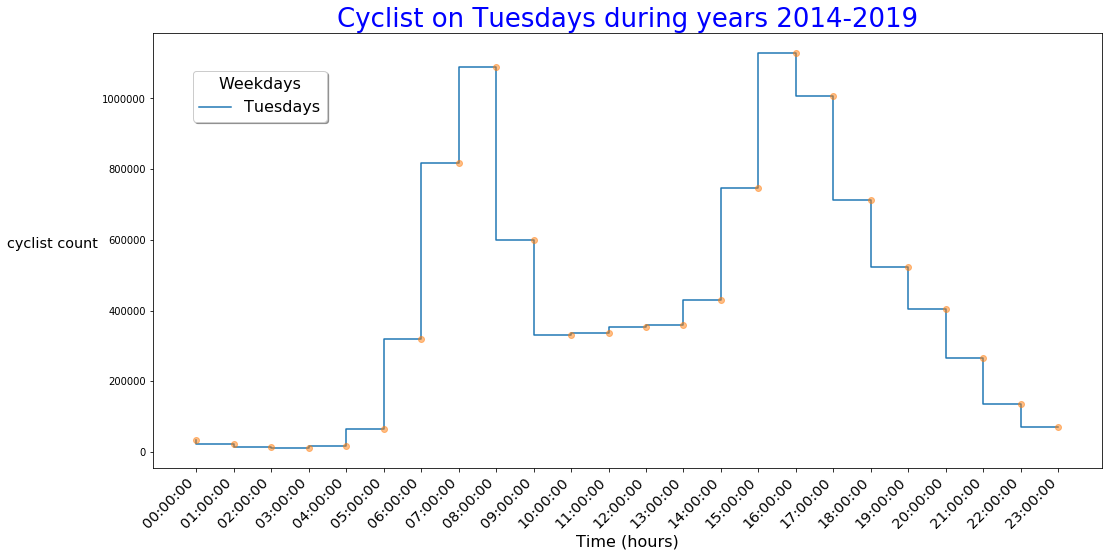

In [16]:
# lets merge Tuesdays together
Tuesdays_total = pd.concat([Tue_days_gb_H, Tue_days_V_gb, Tue_days_E_gb], axis=1)
# Combine all Tuesdays measurement points together (sum of them)
Tuesdays_total = Tuesdays_total.sum(axis=1)
# do Step Demo chart from cyclist on Tuesdays
plt.figure(figsize=(17, 8))
plt.step(Tuesdays_total.index, Tuesdays_total, label='Tuesdays')
plt.plot(Tuesdays_total.index, Tuesdays_total, 'C1o', alpha=0.5)
plt.title('Cyclist on Tuesdays during years 2014-2019', fontsize=26, c='blue')
plt.legend(title='Weekdays', title_fontsize=16, bbox_to_anchor=(0.20, 0.95), borderaxespad=1.0, fontsize=16, shadow=True, columnspacing=4.0, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize='x-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=16)
plt.xticks(Tuesdays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
plt.show()

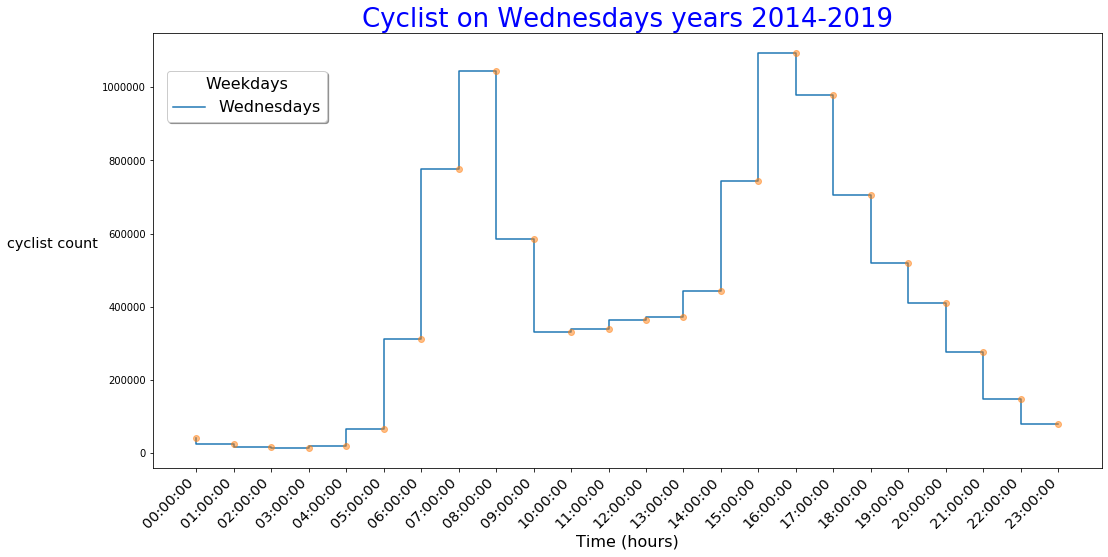

In [17]:
# # lets merge Wednesdays together
Wednesdays_total = pd.concat([Wed_days_gb_H, Wed_days_V_gb, Wed_days_E_gb], axis=1)
# Combine all Wednesdays measurement points together (sum of them)
Wednesdays_total = Wednesdays_total.sum(axis=1)
# do Step Demo chart from cyclist on Wednesdays
plt.figure(figsize=(17, 8))
plt.step(Wednesdays_total.index, Wednesdays_total, label='Wednesdays')
plt.plot(Wednesdays_total.index, Wednesdays_total, 'C1o', alpha=0.5)
plt.title('Cyclist on Wednesdays years 2014-2019', fontsize=26, c='blue')
plt.legend(title='Weekdays', title_fontsize=16, bbox_to_anchor=(0.20, 0.95), borderaxespad=1.0, fontsize=16, shadow=True, columnspacing=4.0, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize='x-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=16)
plt.xticks(Wednesdays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
plt.show()

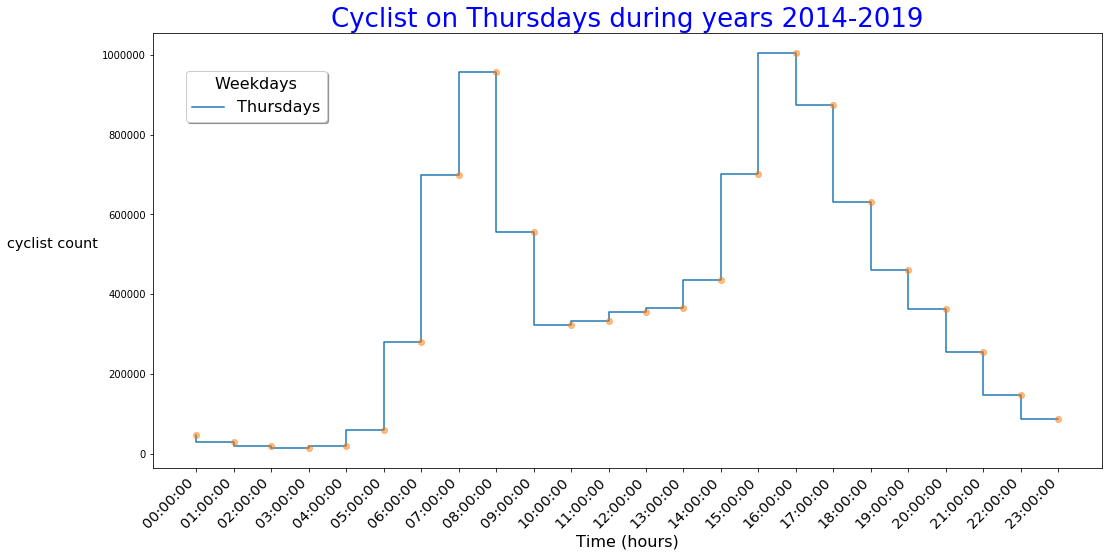

In [18]:
# # lets merge Thursdays together
Thursdays_total = pd.concat([Thu_days_gb_H, Thu_days_V_gb, Thu_days_E_gb], axis=1)
# Combine all Thursdays measurement points together (sum of them)
Thursdays_total = Thursdays_total.sum(axis=1)
# do Step Demo chart from Helsinki cyclist on Thursdays
plt.figure(figsize=(17, 8))
plt.step(Thursdays_total.index, Thursdays_total, label='Thursdays')
plt.plot(Thursdays_total.index, Thursdays_total, 'C1o', alpha=0.5)
plt.title('Cyclist on Thursdays during years 2014-2019', fontsize=26, c='blue')
plt.legend(title='Weekdays', title_fontsize=16, bbox_to_anchor=(0.20, 0.95), borderaxespad=1.0, fontsize=16, shadow=True, columnspacing=4.0, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize='x-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=16)
plt.xticks(Thursdays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
plt.show()

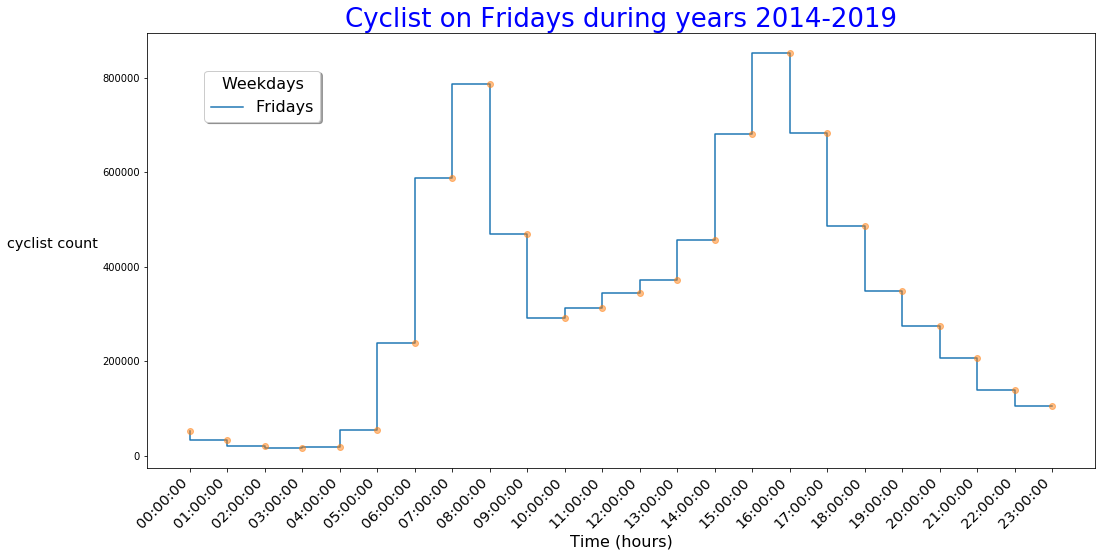

In [19]:
# # lets merge Fridays together
Fridays_total = pd.concat([Fri_days_gb_H, Fri_days_V_gb, Fri_days_E_gb], axis=1)
# Combine all Fridays measurement points together (sum of them)
Fridays_total = Fridays_total.sum(axis=1)
# do Step Demo chart from cyclist on Fridays
plt.figure(figsize=(17, 8))
plt.step(Fridays_total.index, Fridays_total, label='Fridays')
plt.plot(Fridays_total.index, Fridays_total, 'C1o', alpha=0.5)
plt.title('Cyclist on Fridays during years 2014-2019', fontsize=26, c='blue')
plt.legend(title='Weekdays', title_fontsize=16, bbox_to_anchor=(0.20, 0.95), borderaxespad=1.0, fontsize=16, shadow=True, columnspacing=4.0, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize='x-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=16)
plt.xticks(Fridays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
plt.show()

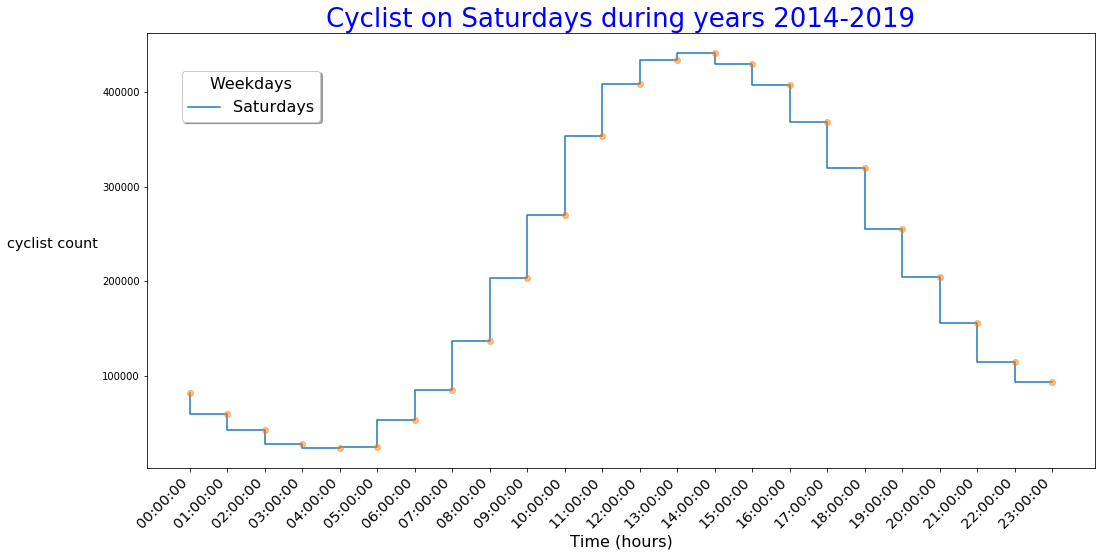

In [20]:
# lets merge Saturdays together
Saturdays_total = pd.concat([Sat_days_gb_H, Sat_days_V_gb, Sat_days_E_gb], axis=1)
# Combine all Saturdays measurement points together (sum of them)
Saturdays_total = Saturdays_total.sum(axis=1)
# do Step Demo chart from cyclist on Saturdays
plt.figure(figsize=(17, 8))
plt.step(Saturdays_total.index, Saturdays_total, label='Saturdays')
plt.plot(Saturdays_total.index, Saturdays_total, 'C1o', alpha=0.5)
plt.title('Cyclist on Saturdays during years 2014-2019', fontsize=26, c='blue')
plt.legend(title='Weekdays', title_fontsize=16, bbox_to_anchor=(0.20, 0.95), borderaxespad=1.0, fontsize=16, shadow=True, columnspacing=4.0, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize='x-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=16)
plt.xticks(Saturdays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
plt.show()

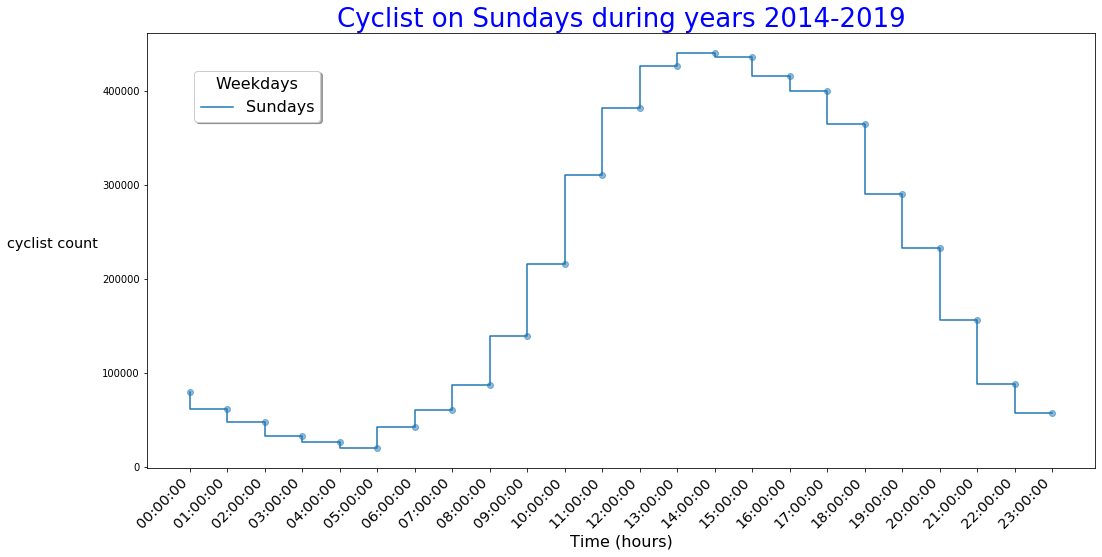

In [21]:
# lets merge Sundays together
Sundays_total = pd.concat([Sun_days_gb_H, Sun_days_V_gb, Sun_days_E_gb], axis=1)
# Combine all Saturdays measurement points together (sum of them)
Sundays_total = Sundays_total.sum(axis=1)
# do Step Demo chart from cyclist on Sundays
plt.figure(figsize=(17, 8))
plt.step(Sundays_total.index, Sundays_total, label='Sundays')
plt.plot(Sundays_total.index, Sundays_total, 'C0o', alpha=0.5)
plt.title('Cyclist on Sundays during years 2014-2019', fontsize=26, c='blue')
plt.legend(title='Weekdays', title_fontsize=16, bbox_to_anchor=(0.20, 0.95), borderaxespad=1.0, fontsize=16, shadow=True, columnspacing=4.0, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize='x-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=16)
plt.xticks(Sundays_total.index, rotation=45, horizontalalignment='right', fontsize='x-large')
plt.show()

### merge all weekdays tables together

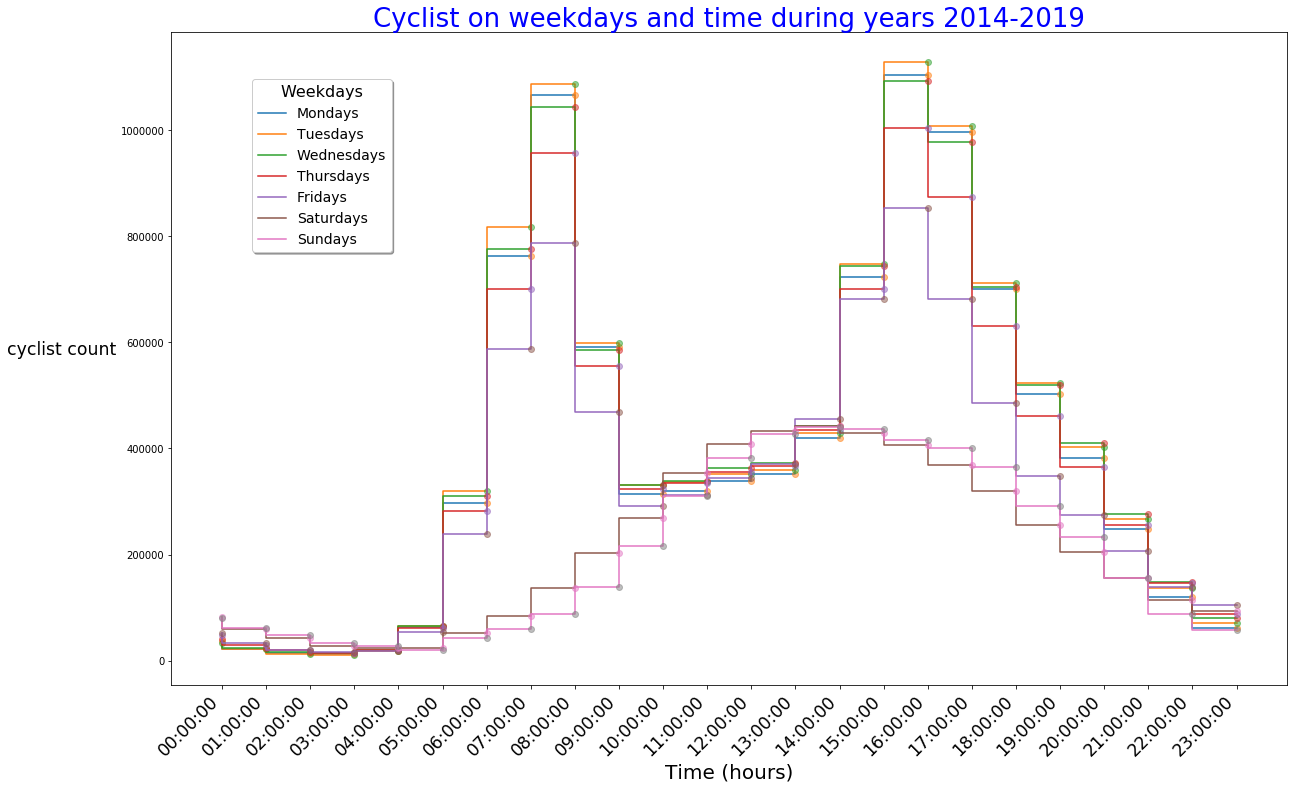

In [22]:
# release index so that tables can be merger together
Mondays_total = Mondays_total.reset_index()
Tuesdays_total = Tuesdays_total.reset_index()
Wednesdays_total = Wednesdays_total.reset_index()
Thursdays_total = Thursdays_total.reset_index()
Fridays_total = Fridays_total.reset_index()
Saturdays_total = Saturdays_total.reset_index()
Sundays_total = Sundays_total.reset_index()
# rename column names
Mondays_total = Mondays_total.rename({0: 'Monday'}, axis=1)
Tuesdays_total = Tuesdays_total.rename({0: 'Tuesday'}, axis=1)
Wednesdays_total = Wednesdays_total.rename({0: 'Wednesday'}, axis=1)
Thursdays_total = Thursdays_total.rename({0: 'Thursday'}, axis=1)
Fridays_total = Fridays_total.rename({0: 'Friday'}, axis=1)
Saturdays_total = Saturdays_total.rename({0: 'Saturday'}, axis=1)
Sundays_total = Sundays_total.rename({0: 'Sunday'}, axis=1)

# lets merge Mondays and Tuesdays
Week_Total = pd.merge(Mondays_total, Tuesdays_total, how='left', on=['Time'])

# lets merge Wednesdays to Week_Total
Week_Total = pd.merge(Week_Total, Wednesdays_total, how='left', on=['Time'])

# lets merge Thursdays to Week_Total
Week_Total = pd.merge(Week_Total, Thursdays_total, how='left', on=['Time'])

# lets merge Fridays to Week_Total
Week_Total = pd.merge(Week_Total, Fridays_total, how='left', on=['Time'])

# lets merge Saturdays to Week_Total
Week_Total = pd.merge(Week_Total, Saturdays_total, how='left', on=['Time'])

# lets merge Sundays to final Week_Total
Week_Total = pd.merge(Week_Total, Sundays_total, how='left', on=['Time'])

# Step Demo chart from Helsinki cyclist
plt.figure(figsize=(20, 12))
# Monday
plt.step(Week_Total.Time, Week_Total.Monday, label='Mondays')
plt.plot(Week_Total.Time, Week_Total.Monday, 'C1o', alpha=0.5)
# Tuesday
plt.step(Week_Total.Time, Week_Total.Tuesday, label='Tuesdays')
plt.plot(Week_Total.Time, Week_Total.Tuesday, 'C2o', alpha=0.5)
# Wednesday
plt.step(Week_Total.Time, Week_Total.Wednesday, label='Wednesdays')
plt.plot(Week_Total.Time, Week_Total.Wednesday, 'C3o', alpha=0.5)
# Thursday
plt.step(Week_Total.Time, Week_Total.Thursday, label='Thursdays')
plt.plot(Week_Total.Time, Week_Total.Thursday, 'C4o', alpha=0.5)
# Friday
plt.step(Week_Total.Time, Week_Total.Friday, label='Fridays')
plt.plot(Week_Total.Time, Week_Total.Friday, 'C5o', alpha=0.5)
# Saturday
plt.step(Week_Total.Time, Week_Total.Saturday, label='Saturdays')
plt.plot(Week_Total.Time, Week_Total.Saturday, 'C6o', alpha=0.5)
# Sunday
plt.step(Week_Total.Time, Week_Total.Sunday, label='Sundays')
plt.plot(Week_Total.Time, Week_Total.Sunday, 'C7o', alpha=0.5)

plt.title('Cyclist on weekdays and time during years 2014-2019', fontsize=26, c='blue')
plt.legend(title='Weekdays', title_fontsize=16, bbox_to_anchor=(0.21, 0.95), borderaxespad=1.0, fontsize=14, shadow=True, columnspacing=4.0, fancybox =True)
plt.ylabel('cyclist count', rotation=0, fontsize='xx-large', horizontalalignment='right')
plt.xlabel('Time (hours)', rotation=0, fontsize=20)
plt.xticks(Week_Total.Time, rotation=45, horizontalalignment='right', fontsize='xx-large')

# show plotting
plt.show()

# plt.savefig('HKIbikers2014_2019.png')

In [23]:
# print out total count of cyclist / each weekdays
Week_Total

,Time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,00:00:00,36959.0,33577.0,40874.0,47665.0,52545.0,81348.0,79542.0
1,01:00:00,21818.0,21785.0,24225.0,29671.0,33066.0,58742.0,61419.0
2,02:00:00,14335.0,13203.0,16520.0,20272.0,19481.0,41949.0,47417.0
3,03:00:00,12381.0,10487.0,13679.0,14636.0,15760.0,27917.0,32672.0
4,04:00:00,18391.0,17742.0,20114.0,19831.0,18317.0,23050.0,26537.0
5,05:00:00,62836.0,65290.0,65799.0,61007.0,53212.0,23965.0,19544.0
6,06:00:00,296704.0,320124.0,310734.0,281770.0,239298.0,52678.0,41898.0
7,07:00:00,762813.0,817810.0,775624.0,700018.0,587811.0,84475.0,60386.0
8,08:00:00,1067257.0,1088298.0,1044321.0,958026.0,787911.0,136470.0,87096.0
9,09:00:00,590647.0,599198.0,585022.0,556140.0,469531.0,203367.0,139399.0
